In [1]:
import random as ra
import numpy as np

#### Definicion de variables

In [2]:

pobl_test = np.array([[1,0,1,0,1,1,1,0,0,1,1,0],
                      [0,0,1,0,1,0,1,1,0,1,1,1]], dtype=np.uint8)

pobl_max = 11 # poblacion maxima impar
p_mut = 0.5


crom = [[0,0,0],[1,0,1],[0,1,0],[1,1,1],[1,1,0],[1,1,0],[1,1,0],[1,0,0],[1,1,1],[0,1,1],[0,0,1]]

prob_acumuladas = [0.6000251668795754, 0.8400352336314056, 0.9360392603321377, 0.9744408710124305, 
                   0.9898015152845476, 0.9959457729933945, 0.9984034760769332, 0.9993865573103488, 
                   0.999779789803715, 0.9999370828010614, 1.0]


##### Selecciona un cromosma ganador 
 Selecciona un cromosma ganador de acuerdo a la probabilidad acumulada ordenada de fitness mejor a peor fitness


In [3]:
def cuantile(prob_acumulada, poblacion):
  p = ra.uniform(0, 1) #aleatorio decimal entre 0 y 1
  for i, prob in enumerate(prob_acumulada):
    if p < prob: # si es mayor o igual a la probabilidad acumulada 
      print(f'Cuantil Seleccionado: {p}\nProbabilidad: {prob}')
      print(f'Cromosoma seleccionado: {poblacion[i]} en Posicion {i}') # obtiene el valor
      return poblacion[i]


[0, 0.6000251668795754, 0.8400352336314056, 0.9360392603321377, 0.9744408710124305, 0.9898015152845476, 0.9959457729933945, 0.9984034760769332, 0.9993865573103488, 0.999779789803715, 0.9999370828010614, 1.0]


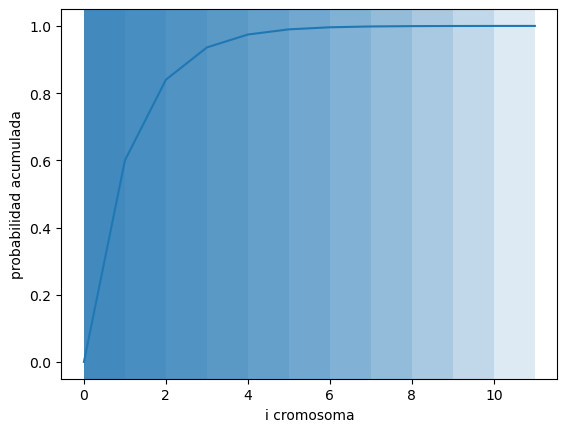

In [4]:
prob_acumuladas = [0.6000251668795754, 0.8400352336314056, 0.9360392603321377, 0.9744408710124305, 
                   0.9898015152845476, 0.9959457729933945, 0.9984034760769332, 0.9993865573103488, 
                   0.999779789803715, 0.9999370828010614, 1.0]


import matplotlib.pyplot as plt
import numpy as np

prob_acumuladas.insert(0, 0) #agregar 0 para visualizar

valor = np.arange(12) # 0 a 11
y = prob_acumuladas
print(y)
fig, ax = plt.subplots()
ax.plot(valor, y)
#ax.ayvlines(y=0.6000251668795754, ymin=0, ymax=11)
for indice in range(12):
  ax.axvspan(0, indice, ymin=0, ymax=1,alpha=0.15)


plt.xlabel('i cromosoma')
plt.ylabel('probabilidad acumulada')
plt.show()





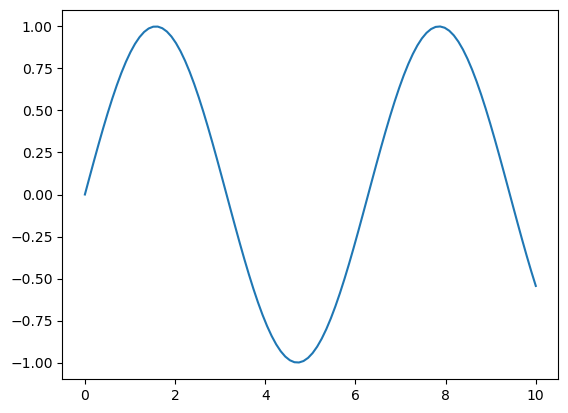

In [5]:
plt.ion()  # Modo interactivo
fig, ax = plt.subplots()
valor = np.linspace(0, 10, 100)
line, = ax.plot(valor, np.sin(valor))  # Línea inicial

for indice in range(100):
    y = np.sin(valor + indice/10)  # Actualiza datos
    line.set_ydata(y)      # Modifica la línea
    fig.canvas.flush_events()  # Fuerza actualización
    plt.pause(0.1)  # Pequeña pausa para visualización

plt.ioff()  # Desactiva modo interactivo al final
plt.show()

#### Crear el poligono convexo y graficar los puntos dentro del mismo
Crea el poligono convexo a partir del cromosoma ganador y la posicion de los votantes

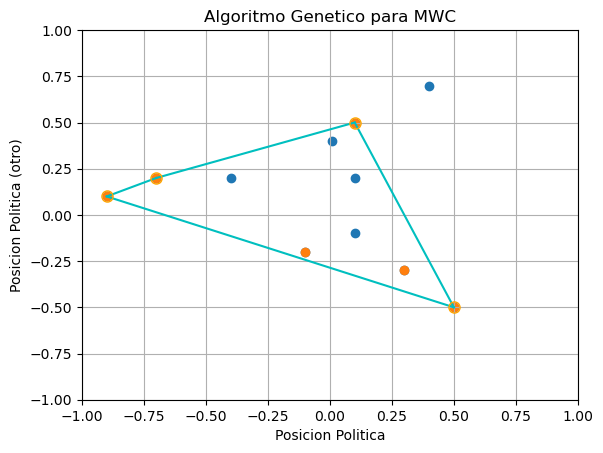

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


def graf_polig_convexo(cromosoma, pts):
  # filtrar puntos
  pts_select = pts[cromosoma == 1]

  fig, ax = plt.subplots() # crear figura
  
  # graficar puntos
  ax.scatter(pts[:, 0], pts[:, 1])
  ax.scatter(pts_select[:, 0], pts_select[:, 1]) #ejes x e y
  
  # calcular y graficar el poligono
  if len(pts_select) >= 3:  #minimo 3 puntos para crearlo
    hull = ConvexHull(pts_select)
    # dibujar las aristas
    for simplex in hull.simplices:
      ax.plot(pts_select[simplex, 0], pts_select[simplex, 1], 'c-')
    # dibujar los vertices
    ax.plot(pts_select[hull.vertices, 0], pts_select[hull.vertices, 1], 'o',
            mec='orange', color='none', lw=1, markersize=8)
  else:
      print("No hay puntos suficientes para formar el poligono convexo")
    
  ax.set_xlabel('Posicion Politica')
  ax.set_ylabel('Posicion Politica (otro)')
  ax.set_title('Algoritmo Genetico para MWC')
  ax.grid(True)
  plt.axis([-1, 1, -1, 1]) #limites del grafico
  plt.show()

# Datos de ejemplo
crom = np.array([0,0,1,1,0,0,1,0,1,1,1])
puntos = np.array([[0.1,0.2],[0.01,0.4],[-0.1,-0.2],[-0.7,0.2],
                   [-0.4,0.2],[0.4,0.7],[0.1,0.5],[0.1,-0.1],
                   [-0.9,0.1],[0.3,-0.3],[0.5,-0.5]])

graf_polig_convexo(crom, puntos)


#### Mutar los cromosomas de manera random

In [7]:
import random as ra

pobl_test = np.array([[1,0,1,0,1,1,1,0,0,1,1,0],
                      [0,0,1,0,1,0,1,1,0,1,1,1],
                      [0,1,0,1,1,0,0,1,0,0,0,1],
                      [1,1,1,0,0,0,1,0,1,1,1,0],
                      [0,1,0,1,1,0,1,1,1,0,0,1]], dtype=np.uint8)


def mutar(poblacion, p_mut):
  #obtener n de cromosomas y n de votos
  n_crom, n_votos = poblacion.shape # 2, 12

  for i in range(n_crom):
    prob = ra.uniform(0, 1) #randomico entre 0 y 1
    if prob < p_mut: #si es menor a la probailidad dada
      #posicion aleatoria entre 0 y n_votos
      pos = ra.randrange(n_votos)

      #mutar e imprimir
      orig = poblacion[i][pos]
      mutado = poblacion[i][pos] ^ 1 #cambiar el bit
      print(f"la posicion {pos} del cromosoma {i} muto de {orig} a {mutado}!" )
    else:
      print(f"El cromosoma {i} no muto" )


p_mut = 0.5
mutar(pobl_test, p_mut)

El cromosoma 0 no muto
El cromosoma 1 no muto
la posicion 9 del cromosoma 2 muto de 0 a 1!
El cromosoma 3 no muto
la posicion 10 del cromosoma 4 muto de 0 a 1!


#### Seleccionar los padres y mezclar los cromosomas

Opt 1: Elegir random y luego ajustar para MWC

In [ ]:
def prob_posicion(n_cromosomas, prob):
  '''calcular la probabilidad de elegir segun la posicion del index
  retorna el arreglo de probabilidades acumuladas'''
  sum = 0
  probabilidades = []
  probab_acumulada = 0

  n_crom, n_votes = n_cromosomas.shape

  #calcula la sumatoria de todas las probabilidades
  for j in range(1, n_crom+1):
    sum += prob*(1-prob)**(j-1)

  #calcula la probabilidad por posicion
  for i in range(1, n_crom+1):
    # cuantil = prob*(1-prob)**(i-1)/sum
    # calcular el cuantil de acuerdo a la probabilidad de seleccionar el mejor
    probab_acumulada += prob*(1-prob)**(i-1)/sum
    # guardar las probabilidades acumuladas
    probabilidades.append(probab_acumulada)

  return probabilidades



def cuantile(prob_acumulada):
  '''selecciona un cromosma ganador de acuerdo a la probabilidad acumulada de cada uno'''
  p_random = ra.uniform(0, 1) #aleatorio decimal entre 0 y 1
  for index, p_cuantil in enumerate(prob_acumulada):
    if p_random <= p_cuantil: # si es mayor o igual a la probabilidad acumulada 
      #print(f'Probabilidad random: {p_random}\nCuantil correspondiente: {p_cuantil}')
      #print(f'Cromosoma seleccionado: {poblacion[i]} en posicion {i}')
      return index #Retornar indice del cromosoma


def generarPoblacion(pobl_actual, p_seleccion, quorum_min, p_mut):
  '''Parametros: 
    - poblacion actual, prob de seleccionar padres, quorum, prob de mutacion
  Obtiene dos padres aleatorios de acuerdo a la distribucion de probabilidad acumulada
  Muta los hijos obtenidos 
  Devuelve la nueva poblacion'''

  n_crom, n_votos = pobl_actual.shape
  prob_acumuladas = prob_posicion(pobl_actual, p_seleccion)

  #seleccionar 2 padres de manera aleatoria de acuerdo la probabilidad por cuantil
  nueva_poblacion = []
  #crear nueva poblacion con tamano n_crom - 1 (para agregar el mejor al final)
  while len(nueva_poblacion) < n_crom-1:
    #devuelve los indices de padre1 y padre2
    i_padre1 = cuantile(prob_acumuladas)
    i_padre2 = cuantile(prob_acumuladas) 

    if i_padre1 != i_padre2: #si son diferentes procede a crear los hijos

      p_corte = ra.randrange(n_votos) #random para el par de cromosomas
      
      #Cruzar los padres y obtener los hijos
      hijo1, hijo2 = crossover(pobl_actual[i_padre1], pobl_actual[i_padre2], p_corte)

      #mutar hijos
      hijo1_mutado = mutacion(hijo1, p_mut)
      hijo2_mutado = mutacion(hijo2, p_mut)

      #validar hijos
      hijo1_validado = validar(hijo1_mutado, quorum_min)
      hijo2_validado = validar(hijo2_mutado, quorum_min)

      #agregar los hijos a la nueva poblacion
      nueva_poblacion.append(hijo1_validado) 
      nueva_poblacion.append(hijo2_validado)

      #nueva_poblacion.append(pobl_actual[i_padre1])
      #nueva_poblacion.append(pobl_actual[i_padre2])

      print(f"Tamano nueva pobl: {len(nueva_poblacion)}")

  #agregar el mejor de la generacion anterior
  mejor = pobl_actual[0]
  nueva_poblacion.append(mejor)
  print(f"Tamano nueva pobl: {len(nueva_poblacion)}")
  return nueva_poblacion #retornar la nueva poblacion


def crossover(padre1, padre2, p_corte):
  '''Cruzar dos pares de cromosomas dado un punto de corte
  Devuelve dos cromosomas hijos'''

  hijo1 = np.concatenate((padre1[:p_corte], padre2[p_corte:]))
  hijo2 = np.concatenate((padre2[:p_corte], padre1[p_corte:]))

  return hijo1, hijo2


def mutacion(cromosoma, p_mut):
  '''cambiar un dato aleatorio de un cromosoma mediante una probabilidad p_mut'''
  n_votos = len(cromosoma)
  
  if ra.random() < p_mut:  # Decide si mutar segun la probabilidad
    posicion = ra.randint(0, n_votos-1)  # posicion aleatoria 0 a n_votos
    cromosoma[posicion] ^= 1  # XOR cambia el bit
  
  return cromosoma

def validar(cromosoma, quorum_minimo):
  '''
  Validar que los datos cumplan con el quorum minimo.
  Si es mayor al quorum convierte unos random hasta cumplir
  Si es menor al quorum convierte ceros random hasta cumplir
  '''
  suma = np.sum(cromosoma)
  if suma > quorum_minimo:
      # Posiciones de todos los 1s
      posiciones = np.where(cromosoma == 1)[0]
      k = suma - quorum_minimo
  elif suma < quorum_minimo:
      # Posiciones de todos los 0s
      posiciones = np.where(cromosoma == 0)[0]
      k = quorum_minimo - suma
  else:
      return cromosoma
  
  # Cambiar k bits aleatorios
  if k > 0:
      cambios = np.random.permutation(posiciones)[:k]
      cromosoma[cambios] ^= 1

  return cromosoma


pobl_test = np.array([[1,0,1,0,1,1,1,0,0,1,1,0,0],
                      [0,0,1,0,1,0,1,1,0,1,1,1,0],
                      [0,1,0,1,1,0,0,1,0,0,0,1,0],
                      [1,1,1,0,0,0,0,0,1,1,1,0,1],
                      [1,1,0,1,1,0,0,1,1,0,0,1,0],
                      [0,1,1,1,1,1,1,0,0,1,0,0,0],
                      [1,0,1,0,1,1,0,1,1,0,0,0,1],
                      [0,1,0,1,0,1,0,1,0,1,1,1,0],
                      [1,0,1,0,0,0,1,0,1,0,1,1,1],
                      [1,1,0,1,1,0,0,1,0,1,1,0,0],
                      [1,0,1,1,1,0,1,0,0,1,0,1,0]], dtype=np.uint8)

p_mut = 0.5 #probabilidad de mutar
p_select = 0.6 #probabilidad de selecccionar al individuo con mejor fitness
quorum_minimo = 7
#prob_acumuladas = [0.6000251668795754, 0.8400352336314056, 0.9360392603321377, 0.9744408710124305, 
#                   0.9898015152845476, 0.9959457729933945, 0.9984034760769332, 0.9993865573103488, 
#                   0.999779789803715, 0.9999370828010614, 1.0]

#cuantile(prob_acumuladas, pobl_test),
generarPoblacion(pobl_test, p_select, quorum_minimo, p_mut)

TypeError: Random.choice() got an unexpected keyword argument 'size'

In [26]:
def prob_posicion(n_cromosomas, prob):
  '''calcular la probabilidad de elegir segun la posicion del index
  retorna el arreglo de probabilidades acumuladas'''
  sum = 0
  probabilidades = []
  probab_acumulada = 0

  n_crom, n_votes = n_cromosomas.shape

  #calcula la sumatoria de todas las probabilidades
  for j in range(1, n_crom+1):
    sum += prob*(1-prob)**(j-1)

  #calcula la probabilidad por posicion
  for i in range(1, n_crom+1):
    # cuantil = prob*(1-prob)**(i-1)/sum
    # calcular el cuantil de acuerdo a la probabilidad de seleccionar el mejor
    probab_acumulada += prob*(1-prob)**(i-1)/sum
    # guardar las probabilidades acumuladas
    probabilidades.append(probab_acumulada)

  return probabilidades



def cuantile(prob_acumulada):
  '''selecciona un cromosma ganador de acuerdo a la probabilidad acumulada de cada uno'''
  p_random = ra.uniform(0, 1) #aleatorio decimal entre 0 y 1
  for index, p_cuantil in enumerate(prob_acumulada):
    if p_random <= p_cuantil: # si es mayor o igual a la probabilidad acumulada 
      #print(f'Probabilidad random: {p_random}\nCuantil correspondiente: {p_cuantil}')
      #print(f'Cromosoma seleccionado: {poblacion[i]} en posicion {i}')
      return index #Retornar indice del cromosoma


def generarPoblacion(pobl_actual, p_seleccion, quorum_min, p_mut):
  '''Parametros: 
    - poblacion actual, prob de seleccionar padres, quorum, prob de mutacion
  Obtiene dos padres aleatorios de acuerdo a la distribucion de probabilidad acumulada
  Muta los hijos obtenidos 
  Devuelve la nueva poblacion'''

  n_crom, n_votos = pobl_actual.shape
  prob_acumuladas = prob_posicion(pobl_actual, p_seleccion)

  #seleccionar 2 padres de manera aleatoria de acuerdo la probabilidad por cuantil
  nueva_poblacion = []
  #crear nueva poblacion con tamano n_crom - 1 (para agregar el mejor al final)
  while len(nueva_poblacion) < n_crom-1:
    #devuelve los indices de padre1 y padre2
    i_padre1 = cuantile(prob_acumuladas)
    i_padre2 = cuantile(prob_acumuladas) 

    if i_padre1 != i_padre2: #si son diferentes procede a crear los hijos

      p_corte = ra.randrange(n_votos) #random para el par de cromosomas
      
      #Cruzar los padres y obtener los hijos
      hijo1, hijo2 = crossover(pobl_actual[i_padre1], pobl_actual[i_padre2], p_corte)

      #mutar hijos
      hijo1_mutado = mutacion(hijo1, p_mut)
      hijo2_mutado = mutacion(hijo2, p_mut)

      #validar hijos
      hijo1_validado = validar(hijo1_mutado, quorum_min)
      hijo2_validado = validar(hijo2_mutado, quorum_min)

      #agregar los hijos a la nueva poblacion
      nueva_poblacion.append(hijo1_validado) 
      nueva_poblacion.append(hijo2_validado)

      #nueva_poblacion.append(pobl_actual[i_padre1])
      #nueva_poblacion.append(pobl_actual[i_padre2])

      print(f"Tamano nueva pobl: {len(nueva_poblacion)}")

  #agregar el mejor de la generacion anterior
  mejor = pobl_actual[0]
  nueva_poblacion.append(mejor)
  print(f"Tamano nueva pobl: {len(nueva_poblacion)}")
  return nueva_poblacion #retornar la nueva poblacion


def crossover(padre1, padre2, p_corte):
  '''Cruzar dos pares de cromosomas dado un punto de corte
  Devuelve dos cromosomas hijos'''

  hijo1 = np.concatenate((padre1[:p_corte], padre2[p_corte:]))
  hijo2 = np.concatenate((padre2[:p_corte], padre1[p_corte:]))

  return hijo1, hijo2


def mutacion(cromosoma, p_mut):
  '''cambiar un dato aleatorio de un cromosoma mediante una probabilidad p_mut'''
  n_votos = len(cromosoma)
  
  if ra.random() < p_mut:  # Decide si mutar segun la probabilidad
    posicion = ra.randint(0, n_votos-1)  # posicion aleatoria 0 a n_votos
    cromosoma[posicion] ^= 1  # XOR cambia el bit
  
  return cromosoma

def validar(cromosoma, quorum_minimo):
  '''
  Validar que los datos cumplan con el quorum minimo.
  Si es mayor al quorum convierte unos random hasta cumplir
  Si es menor al quorum convierte ceros random hasta cumplir
  '''

  #si hay mas que el quorum se cambia un 1 random hasta cumplir
  suma = np.sum(cromosoma)
  if suma > quorum_minimo:
    while np.sum(cromosoma) != quorum_minimo:
      random_pos = ra.randint(0, len(cromosoma)-1)
      if cromosoma[random_pos] == 1:
        cromosoma[random_pos] ^= 1
  #si hay menos que quorum se cambia un 0 random hasta cumplir
  elif suma < quorum_minimo:
    while np.sum(cromosoma) != quorum_minimo:
      random_pos = ra.randint(0, len(cromosoma)-1)
      if cromosoma[random_pos] == 0:
        cromosoma[random_pos] ^= 1

  return cromosoma


pobl_test = np.array([[1,0,1,0,1,1,1,0,0,1,1,0,0],
                      [0,0,1,0,1,0,1,1,0,1,1,1,0],
                      [0,1,0,1,1,0,0,1,0,0,0,1,0],
                      [1,1,1,0,0,0,0,0,1,1,1,0,1],
                      [1,1,0,1,1,0,0,1,1,0,0,1,0],
                      [0,1,1,1,1,1,1,0,0,1,0,0,0],
                      [1,0,1,0,1,1,0,1,1,0,0,0,1],
                      [0,1,0,1,0,1,0,1,0,1,1,1,0],
                      [1,0,1,0,0,0,1,0,1,0,1,1,1],
                      [1,1,0,1,1,0,0,1,0,1,1,0,0],
                      [1,0,1,1,1,0,1,0,0,1,0,1,0]], dtype=np.uint8)

p_mut = 0.5 #probabilidad de mutar
p_select = 0.6 #probabilidad de selecccionar al individuo con mejor fitness
quorum_minimo = 7
#prob_acumuladas = [0.6000251668795754, 0.8400352336314056, 0.9360392603321377, 0.9744408710124305, 
#                   0.9898015152845476, 0.9959457729933945, 0.9984034760769332, 0.9993865573103488, 
#                   0.999779789803715, 0.9999370828010614, 1.0]

#cuantile(prob_acumuladas, pobl_test),
generarPoblacion(pobl_test, p_select, quorum_minimo, p_mut)

Tamano nueva pobl: 2
Tamano nueva pobl: 4
Tamano nueva pobl: 6
Tamano nueva pobl: 8
Tamano nueva pobl: 10
Tamano nueva pobl: 11


[array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=uint8),
 array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=uint8),
 array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=uint8),
 array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=uint8),
 array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=uint8),
 array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=uint8),
 array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=uint8),
 array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=uint8),
 array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=uint8),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=uint8),
 array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=uint8)]

Opt 2: Con arreglo de puntos de corte validos

In [ ]:
def prob_posicion(n_cromosomas, prob):
  '''calcular la probabilidad de elegir segun la posicion del index
  retorna el arreglo de probabilidades acumuladas'''
  sum = 0
  probabilidades = []
  probab_acumulada = 0

  n_crom, n_votes = n_cromosomas.shape

  #calcula la sumatoria de todas las probabilidades
  for j in range(1, n_crom+1):
    sum += prob*(1-prob)**(j-1)

  #calcula la probabilidad por posicion
  for i in range(1, n_crom+1):
    # cuantil = prob*(1-prob)**(i-1)/sum
    # calcular el cuantil de acuerdo a la probabilidad de seleccionar el mejor
    probab_acumulada += prob*(1-prob)**(i-1)/sum
    # guardar las probabilidades acumuladas
    probabilidades.append(probab_acumulada)

  return probabilidades



def cuantile(prob_acumulada):
  '''selecciona un cromosma ganador de acuerdo a la probabilidad acumulada de cada uno'''
  p_random = ra.uniform(0, 1) #aleatorio decimal entre 0 y 1
  for index, p_cuantil in enumerate(prob_acumulada):
    if p_random <= p_cuantil: # si es mayor o igual a la probabilidad acumulada 
      #print(f'Probabilidad random: {p_random}\nCuantil correspondiente: {p_cuantil}')
      #print(f'Cromosoma seleccionado: {poblacion[i]} en posicion {i}')
      return index #Retornar indice del cromosoma


def generarPoblacion(pobl_orig, p_seleccion, quorum_min):
  '''
  Parametros: 
    -matriz de poblacion original 
    -probabilidad de seleccionar al mejor
  Obtiene dos padres aleatorios de acuerdo a la distribucion de probabilidad acumulada
  Muta los hijos obtenidos 
  Devuelve la nueva poblacion'''
  # Segun el profe:
  # Es con reemplazo.
  # Seleccionar 2 de acuerdo a la probabilidad (diferentes supongo)
  # Se cruzan, 
  # Se mutan los nuevos cromosomas
  # y se colocan en la nueva poblacion
  # los padres no se eliminan, vuelven a la poblacion original 
  # y pueden volver a ser seleccionados
  # De esta manera los mejores siempre tendran mas descendencia

  n_crom, n_votos = pobl_orig.shape

  prob_acumuladas = prob_posicion(pobl_orig, p_seleccion)

  #seleccionar 2 padres de manera aleatoria de acuerdo la probabilidad por cuantil
  #TODO: -que no se repita! 
  #      -falta optimizar!
  #      -cruzar correctamente
  #      -mutar 
  #      -validar
  #opcion 1: (se puede o debe mejorar)
  nueva_poblacion = []
  while len(nueva_poblacion) < n_crom-1: #nueva poblacion debe ser tamanio n_crom-1
    #devuelve los indices de padre1 y padre2
    i_padre1 = cuantile(prob_acumuladas)
    i_padre2 = cuantile(prob_acumuladas) 
    if i_padre1 != i_padre2: #si son diferentes procede a crear los hijos
      pts_validos = pcorte_validos(pobl_orig[i_padre1], pobl_orig[i_padre2], quorum_min)
      
      print(f"Indices de padres: {i_padre1},{i_padre2}")
      print(pts_validos)

      print(f'padre1:{pobl_orig[i_padre1]}')
      print(f'padre2:{pobl_orig[i_padre2]}')

      nueva_poblacion.append(pobl_orig[i_padre1])
      nueva_poblacion.append(pobl_orig[i_padre2])

      print(f"Tamano nueva pobl: {len(nueva_poblacion)}")
  

  #agrear el mejor aqui!
  return nueva_poblacion #retornar la nueva poblacion


def pcorte_validos(padre1, padre2, quorum_min):
  '''Calcular puntajes de corte validos para cumplir el quorum
  Devuelve el arreglo de puntos validos'''
  n = len(padre1)
  pts_validos = []
  

  for i in range(1, n-1):
    # Contar los unos en la parte superior e inferior de cada padre
    unos_pdre1_sup = np.sum(padre1[:i])
    unos_pdre2_inf = np.sum(padre2[i:])

    # Verificar si el intercambio mantiene el balance
    if (unos_pdre1_sup + unos_pdre2_inf) == quorum_min:
      #print(f"indice con balance{i}")
      pts_validos.append(i)
  
  return pts_validos



def validar(cromosoma, quorum_minimo):
  '''
  Validar que los datos cumplan con el quorum minimo
  '''
  #Desventajas: puede tomar consumir mucho procesamiento recorrer los arrays
  #contar la cantidad de votos:
  #si hay mas que el quorum minimo se agrega un xor a un 1 random hasta cumplir con el quorum
  #si hay menos que quorum minimo se agrega un xor a un 0 random hasta cumplir con el quorum

  ...


pobl_test = np.array([[1,0,1,0,1,1,1,0,0,1,1,0,0],
                      [0,0,1,0,1,0,1,1,0,1,1,1,0],
                      [0,1,0,1,1,0,0,1,0,0,0,1,0],
                      [1,1,1,0,0,0,0,0,1,1,1,0,1],
                      [1,1,0,1,1,0,0,1,1,0,0,1,0],
                      [0,1,1,1,1,1,1,0,0,1,0,0,0],
                      [1,0,1,0,1,1,0,1,1,0,0,0,1],
                      [0,1,0,1,0,1,0,1,0,1,1,1,0],
                      [1,0,1,0,0,0,1,0,1,0,1,1,1],
                      [1,1,0,1,1,0,0,1,0,1,1,0,0],
                      [1,0,1,1,1,0,1,0,0,1,0,1,0]], dtype=np.uint8)

p_mut = 0.6 #probabilidad de selecccionar al individuo con mejor fitness
quorum_minimo = 7
#prob_acumuladas = [0.6000251668795754, 0.8400352336314056, 0.9360392603321377, 0.9744408710124305, 
#                   0.9898015152845476, 0.9959457729933945, 0.9984034760769332, 0.9993865573103488, 
#                   0.999779789803715, 0.9999370828010614, 1.0]

#cuantile(prob_acumuladas, pobl_test),
generarPoblacion(pobl_test, p_mut, quorum_minimo)